In [1]:
from gen import *
from matplotlib import pyplot as plt
import networkx as nx

In [2]:
def visualize_graph(graph, size=(5, 4)):
    G = nx.DiGraph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
        if node not in G:
            G.add_node(node)
    
    pos = nx.spring_layout(G)
    plt.figure(figsize=size)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_color="black", edge_color="gray", arrowsize=20)
    plt.show()

In [ ]:
#(1) define partial order (example w/ 2 disconnected components, yielding a 792*792 matrix)
po = np.array([1,2,2,3,2,4,3,5,4,6,7,3, 7,5,1,4,  8,9])-1 #10,11
print(po)

In [3]:
#n=8 example (dfac=[8] from fgen)
po=np.array([1, 3, 1, 4, 2, 4, 2, 5, 3, 5])-1
print(po)

[0 2 0 3 1 3 1 4 2 4]


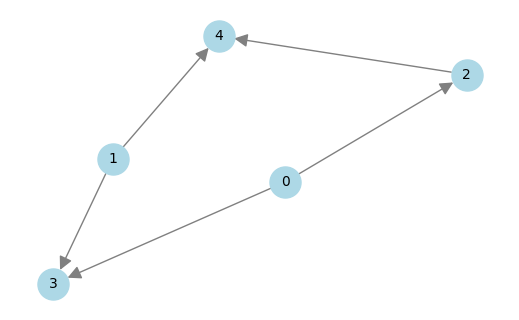

In [5]:
#visualize (optional)
graph = edges_to_adjacency_list(po)
graph_comps = [edges_to_adjacency_list(i) for i in po_groups(po)] #list(map(lambda i: edges_to_adjacency_list(i), po_sorted))
visualize_graph(graph, (5,3))

In [6]:
group_pos = po_groups(po)
group_nodes =[np.sort(np.unique(i)) for i in group_pos] #segment fixed node order
nodes = np.arange(np.max(po)+1)

phi = get_phi(nodes, group_pos, group_nodes, prints=True) #if you want a better idea of how it works!
n=len(phi)
A = genmat(phi,n,nodes)
A = symsub(A,n,nodes)

fixed-order (1..n) permutations:  8 [[0, 1, 2, 3, 4], [0, 1, 2, 4, 3], [0, 1, 3, 2, 4], [0, 2, 1, 3, 4], [0, 2, 1, 4, 3], [1, 0, 2, 3, 4], [1, 0, 2, 4, 3], [1, 0, 3, 2, 4]]
node labels (up to combination):  1 [[0, 1, 2, 3, 4]]


In [7]:
#note: trying to display very large symbolic matrices will make your computer sad :)
A

Matrix([
[x_7, x_3, x_6, x_2, x_5, x_1, x_4, x_0],
[x_3, x_7, x_6, x_5, x_2, x_4, x_1, x_0],
[x_6, x_3, x_7, x_2, x_5, x_0, x_4, x_1],
[x_2, x_5, x_6, x_7, x_3, x_1, x_4, x_0],
[x_5, x_2, x_6, x_3, x_7, x_4, x_1, x_0],
[x_1, x_4, x_0, x_2, x_5, x_7, x_3, x_6],
[x_4, x_1, x_0, x_5, x_2, x_3, x_7, x_6],
[x_0, x_4, x_1, x_2, x_5, x_6, x_3, x_7]])